In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Case biznesowy: Optymalizacja rekomendacji miejsc na platformie Google Maps

**Opis:**
Firma Google chce zoptymalizować proces rekomendacji miejsc na platformie Google Maps, aby lepiej dopasować propozycje miejsc do preferencji i zachowań użytkowników. Aktualnie użytkownicy często otrzymują rekomendacje miejsc, które nie są dla nich istotne lub interesujące, co prowadzi do obniżenia satysfakcji z korzystania z platformy. Celem tego projektu jest zastosowanie technik klasteryzacji do grupowania miejsc na podstawie ich cech, takich jak kategoria, lokalizacja geograficzna, oceny użytkowników, liczba recenzji, godziny otwarcia, itp. Następnie te klastry mogą być wykorzystane do dostarczania spersonalizowanych rekomendacji użytkownikom w oparciu o ich indywidualne preferencje.

In [227]:
data = pd.read_csv("data/google_places_data.csv")

In [4]:
pd.options.display.max_columns = 50
data.head()

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,place_id,place_link,types,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,city,verified,state,Friday_morning,Friday_afternoon,Friday_evening,Saturday_morning,Saturday_afternoon,Saturday_evening,Sunday_morning,Sunday_afternoon,Sunday_evening,Monday_morning,Monday_afternoon,Monday_evening,Tuesday_morning,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
0,0x3e6751d65629cb05:0x27cbb7ddadc7008c,Unknown,حصن الظفرة Al Dhafra Fort,PXMJ+H7J حصن الظفرة Al Dhafra Fort - Unnamed R...,23.733973,53.980629,58.0,4.7,Asia/Dubai,Unknown,ChIJBcspVtZRZz4RjADHrd23yyc,https://www.google.com/maps/place/data=!3m1!4b...,Museum,2-6 PM,10 AM-6 PM,10 AM-6 PM,10 AM-6 PM,10 AM-6 PM,10 AM-6 PM,10 AM-6 PM,Abu Dhabi,False,Open ⋅ Closes 6 PM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
1,0x3e675d61493af035:0xa4f20f24f9e8beb7,971569049905,Rafiullah,MP4R+WQJ Rafiullah - Zayed City - Abu Dhabi - ...,23.657332,53.741881,3.0,3.0,Asia/Dubai,Unknown,ChIJNfA6SWFdZz4Rt77o-SQP8qQ,https://www.google.com/maps/place/data=!3m1!4b...,Museum,Open 24 hours,Open 24 hours,Open 24 hours,Open 24 hours,Open 24 hours,Open 24 hours,Open 24 hours,Abu Dhabi,False,Open 24 hours,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,United Arab Emirates
2,0x3e91f7041ac64d33:0x6120c5af14b63b93,96822081500,National Museum of Oman,"National Museum of Oman, opposite Al Alam Pala...",23.611601,58.593728,3499.0,4.6,Asia/Muscat,https://www.nm.gov.om/,ChIJM03GGgT3kT4Rkzu2FK_FIGE,https://www.google.com/maps/place/data=!3m1!4b...,"National museum, Museum, Tourist attraction",2-6 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,Muscat,True,Open ⋅ Closes 5 PM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,Oman
3,0x487bb1e7815c44db:0x417132a42bd93ef6,443300580058,Science and Industry Museum,"Science and Industry Museum, Liverpool Rd, Man...",53.477136,-2.254582,17398.0,4.4,Europe/London,https://www.scienceandindustrymuseum.org.uk/,ChIJ20Rcgeexe0gR9j7ZK6QycUE,https://www.google.com/maps/place/data=!3m1!4b...,"Science museum, Heritage museum, Museum, Touri...",10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,Manchester,True,Open ⋅ Closes 5 PM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,United Kingdom
4,0x487e78e1955eb419:0x4c55c87f0a46d173,441913704000,"Beamish, the Living Museum of the North","Beamish, the Living Museum of the North, Stanl...",54.884752,-1.659321,21957.0,4.8,Europe/London,https://www.beamish.org.uk/,ChIJGbReleF4fkgRc9FGCn_IVUw,https://www.google.com/maps/place/data=!3m1!4b...,"Open air museum, Museum, Tourist attraction",10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,Stanley,True,Open ⋅ Closes 5 PM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,United Kingdom


In [180]:
colnames = data.columns

### Basic statistics

In [228]:
data.shape

(15203, 46)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15203 entries, 0 to 15202
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   business_id          15203 non-null  object 
 1   phone_number         15203 non-null  object 
 2   name                 15203 non-null  object 
 3   full_address         15203 non-null  object 
 4   latitude             15198 non-null  float64
 5   longitude            15198 non-null  float64
 6   review_count         15203 non-null  float64
 7   rating               15203 non-null  float64
 8   timezone             15203 non-null  object 
 9   website              15203 non-null  object 
 10  place_id             15203 non-null  object 
 11  place_link           15203 non-null  object 
 12  types                15203 non-null  object 
 13  Friday               15203 non-null  object 
 14  Saturday             15203 non-null  object 
 15  Sunday               15203 non-null 

Data types:
- int (21): columns describing opening hours, which are in fact binary (0/1)
</br>

- float (5): latitude, longitude, review_count, rating and geo_cluster - cluster identifier from already performed clustering
</br>

- bool (1): verified - whether the place is verified
</br>

- object (19): most of the descriptions, adresses, id's

In [50]:
def check_if_string(value):
    """
    Funkcja sprawdzająca, czy wartość może być rzutowana na typ str.
    """
    try:
        str(value)
        return True
    except:
        return False

def check_column_for_strings(column):
    """
    Funkcja sprawdzająca, czy każda wartość w kolumnie może być rzutowana na typ str.
    """
    return all(column.apply(check_if_string))

for column in data.select_dtypes(include=['object']).columns:
    formatted_text = "{:42}".format(f"{column} can be converted to string: ")
    print(f"{formatted_text}{check_column_for_strings(data[column])}")

business_id can be converted to string:   True
phone_number can be converted to string:  True
name can be converted to string:          True
full_address can be converted to string:  True
timezone can be converted to string:      True
website can be converted to string:       True
place_id can be converted to string:      True
place_link can be converted to string:    True
types can be converted to string:         True
Friday can be converted to string:        True
Saturday can be converted to string:      True
Sunday can be converted to string:        True
Monday can be converted to string:        True
Tuesday can be converted to string:       True
Wednesday can be converted to string:     True
Thursday can be converted to string:      True
city can be converted to string:          True
state can be converted to string:         True
country can be converted to string:       True


In [229]:
# Zmień typ danych object na string
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].astype("string")

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15203 entries, 0 to 15202
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   business_id          15203 non-null  string 
 1   phone_number         15203 non-null  string 
 2   name                 15203 non-null  string 
 3   full_address         15203 non-null  string 
 4   latitude             15198 non-null  float64
 5   longitude            15198 non-null  float64
 6   review_count         15203 non-null  float64
 7   rating               15203 non-null  float64
 8   timezone             15203 non-null  string 
 9   website              15203 non-null  string 
 10  place_id             15203 non-null  string 
 11  place_link           15203 non-null  string 
 12  types                15203 non-null  string 
 13  Friday               15203 non-null  string 
 14  Saturday             15203 non-null  string 
 15  Sunday               15203 non-null 

Numeric columns - conclusions:
- a lot of values for latitude oscilate <b>about 25</b>, sd is small
</br>

- longtitude values are more spread out but mostly <b>about 55</b>
</br>

- it seems that most data is only from one region (country)
</br>

- columns for opening hours are in fact <b>binary (0 or 1)</b>
</br>

- the cluster analysis that was pre-done on this dataset resulted in <b>4 clusters</b>


In [166]:
# Statistics for numeric columns:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,15198.0,33.180311,12.249122,-45.577163,25.260005,25.311978,45.291451,70.032732
longitude,15198.0,24.517834,50.581680,-157.870613,5.276266,55.284218,55.370963,176.230310
review_count,15203.0,709.113136,5657.130516,1.000000,8.000000,32.000000,114.000000,256877.000000
rating,15203.0,4.287417,0.669842,1.000000,4.100000,4.400000,4.700000,5.000000
Friday_morning,15203.0,0.106624,0.308644,0.000000,0.000000,0.000000,0.000000,1.000000
Friday_afternoon,15203.0,0.106624,0.308644,0.000000,0.000000,0.000000,0.000000,1.000000
Friday_evening,15203.0,0.106624,0.308644,0.000000,0.000000,0.000000,0.000000,1.000000
Saturday_morning,15203.0,0.108860,0.311474,0.000000,0.000000,0.000000,0.000000,1.000000
Saturday_afternoon,15203.0,0.108860,0.311474,0.000000,0.000000,0.000000,0.000000,1.000000
Saturday_evening,15203.0,0.108860,0.311474,0.000000,0.000000,0.000000,0.000000,1.000000


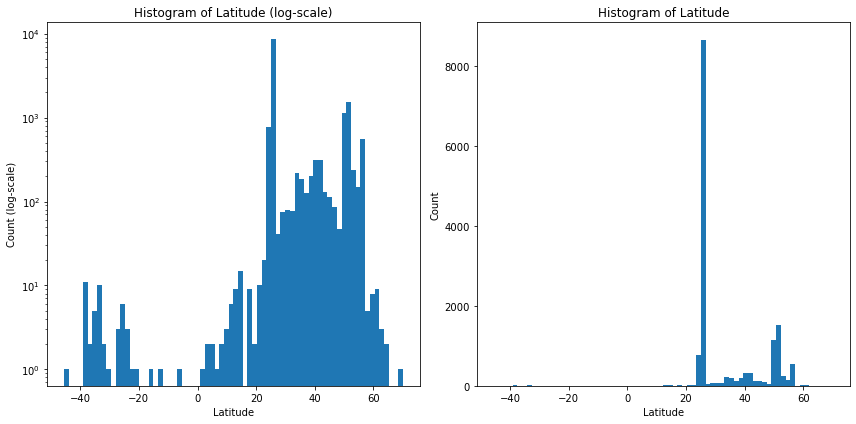

In [92]:
# Utworzenie dwóch subplotów obok siebie
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Wygenerowanie histogramu z osią logarytmiczną
axes[0].hist(x=data["latitude"], bins="fd", log=True)
axes[0].set_xlabel('Latitude')
axes[0].set_ylabel('Count (log-scale)')
axes[0].set_title('Histogram of Latitude (log-scale)')

# Wygenerowanie histogramu z osią liniową
axes[1].hist(x=data["latitude"], bins="fd", log=False)
axes[1].set_xlabel('Latitude')
axes[1].set_ylabel('Count')
axes[1].set_title('Histogram of Latitude')

# Wyświetlenie subplotów
plt.tight_layout()
plt.show()

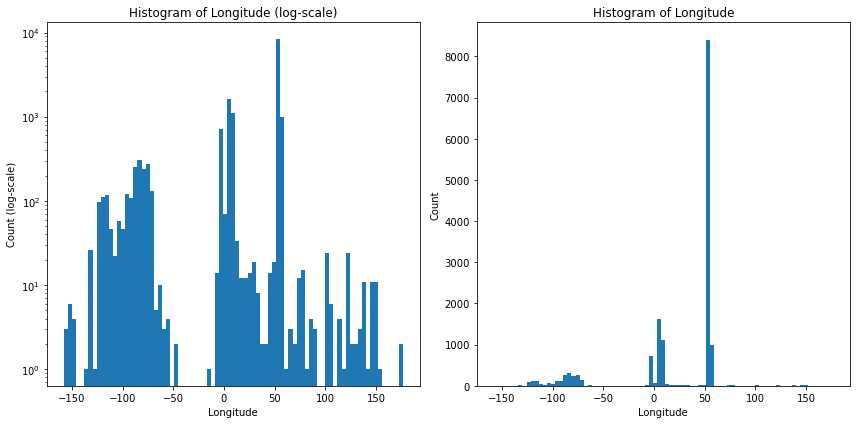

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(x=data["longitude"], bins="fd", log=True)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Count (log-scale)')
axes[0].set_title('Histogram of Longitude (log-scale)')

axes[1].hist(x=data["longitude"], bins="fd", log=False)
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Count')
axes[1].set_title('Histogram of Longitude')

plt.tight_layout()
plt.show()

String columns - conclusions:
- there are some repeated IDs - need to check for duplicate rows
</br>

- there are duplicate names of places (ex. Geldmaat - 116 times, this is a chain of ATMs)
</br>

- there are 112 unique values for timezone, while there should only be 24
</br>

- we can notice that some columns have values corresponding to NA, which are frequent, such as 'Unknown'
</br>

- hotel is the most popular place type
</br>

- United Arab Emirates is the most frequent value for country (9614 out of 15203 places) but there are 194 different coutries in total. This is suspicious and might be the case that the same country has a few different names because of misspelling.
</br>

- the most popular city in the dataset is Dubai

In [167]:
# Description of non-numeric columns
data.describe(include = ['string']).T

,count,unique,top,freq
business_id,15203,15108,0x3e5f432f9552583d:0xc29c1687b02b5c17,2
phone_number,15203,11282,Unknown,2610
name,15203,14192,Geldmaat,116
full_address,15203,14737,Unknown,368
timezone,15203,112,Asia/Dubai,9383
website,15203,7530,Unknown,6256
place_id,15203,15108,ChIJPVhSlS9DXz4RF1wrsIcWnMI,2
place_link,15203,15108,https://www.google.com/maps/place/data=!3m1!4b...,2
types,15203,4130,Hotel,406
Friday,15203,761,Hours not available,4312


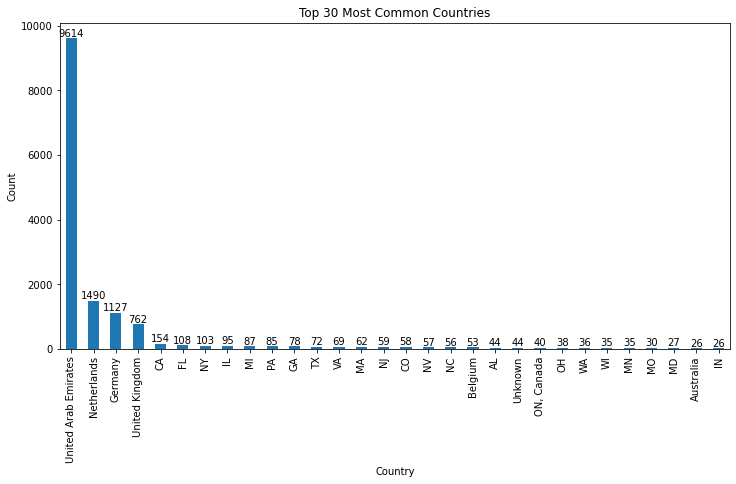

In [129]:
# Zliczanie wystąpień każdej unikalnej wartości w kolumnie "country"
plt.figure(figsize = (12,6))

country_counts = data["country"].value_counts().head(30)

ax = country_counts.plot.bar()

for i, count in enumerate(country_counts):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 30 Most Common Countries')

plt.show()

- It can be observed that for USA, postal abbr. are given instead of country name.
- Some of the country names are badly scraped and need to be corrected in feature engineering processs. For example there are 13 different names for India, 9 different names for Canada etc.
- There is a value 'Unknown' appearing 44 times but we can check that it doesn't correspond to NAs but rather to inability to extract the country from address string correctly. This is to be corrected later in feature engineering process.

In [133]:
a = data[data['country'] == 'WA']["full_address"]
for s in a:
    print(s)

The Museum of Flight, Seattle, WA 98108
Museum of Glass, 1801 Dock St, Tacoma, WA 98402
Famous Footwear, TOWN CENTER, 1604 W Poplar St, Walla Walla, WA 99362
Burien Laundry, 14300 1st Ave S, Burien, WA 98168
Southwest laundry, 11445 Des Moines Memorial Dr S, Seattle, WA 98168
Best Western Plus Ellensburg Hotel, 211 Umptanum Rd, Ellensburg, WA 98926
Hotel Windrow, 502 N Main St, Ellensburg, WA 98926
Seattle City Hall, 600 4th Ave, Seattle, WA 98104
Point Defiance Zoo & Aquarium, 5400 N Pearl St, Tacoma, WA 98407
Kirkland Bakery, 219 Kirkland Ave #102, Kirkland, WA 98033
Le Panier, 1902 Pike Pl, Seattle, WA 98101
The Store, 919 37th St, Anacortes, WA 98221
Baked., 2604 California Ave SW, Seattle, WA 98116
Longview Public Library, 1600 Louisiana St, Longview, WA 98632
Amy Wagner - Prime Listings Group, 1027 State Ave #102, Marysville, WA 98270
Preferred Property Management NW, 1901 Main St Box #835, Lake Stevens, WA 98258
ilani, 1 Cowlitz Wy, Ridgefield, WA 98642
Northern Quest Resort & C

In [132]:
a = data[data['country'] == 'Unknown']["full_address"]
for s in a:
    print(s)

Tower of David, Jerusalem
treat. nails & hair spa, Prince Sultan Road, Qurtoba, Al Khobar 34235, Saudi Arabia
The Hair, Jabir bin Abdullah, Al Mutamarat, Riyadh 12712, Saudi Arabia
Cemetery Malakoff (Old Jewish cemetery), 52 Rue Jules Wilhelm, 2728 Neudorf-Weimershof Luxembourg
Level Shoes, Riyadh Park Mall, Al Aqiq, Riyadh 11413, Saudi Arabia
Wheels Bike Shop (Trek), King Abdulaziz Rd, Madinat Al Umal, Al Khobar 34442, Saudi Arabia
Wheels Bike Shop (Trek), King Abdul Aziz Branch Rd, Alyasmin, Riyadh 13322, Saudi Arabia
هايك اند بايك Hike and Bike, King Saud St, Al Mazruiyah, Dammam 32414, Saudi Arabia
Reinhard's Painting Services, West Virginia 26810
Carowinds, North Carolina
Walt Disney World® Resort, Florida
NOCH, 2777 Bashar Ibn Burd St, Olaya, Al Khobar 34448, Saudi Arabia
Hacked, King Abdullah Rd, Ar Rahmaniyyah, Riyadh 12343, Saudi Arabia
Paul Bakery & Restaurant, طريق الأمير محمد بن سعد بن عبدالعزيز, Al Olaya, Riyadh 12222, Saudi Arabia
Lock, Hittin, Riyadh 13512, Saudi Arabia


In [165]:
india_count = 0
italy_count = 0
canada_count = 0
for s in data["country"].value_counts().index:
    if 'India' in s:
        india_count = india_count + 1
    if 'Italy' in s:
        italy_count = italy_count +1
    if 'Canada' in s:
        canada_count = canada_count + 1
    print(s)
print()
print("Number of different names for country 'India': ", india_count)
print("Number of different names for country 'Italy': ", italy_count)
print("Number of different names for country 'Canada': ", canada_count)

United Arab Emirates
Netherlands
Germany
United Kingdom
CA
FL
NY
IL
MI
PA
GA
TX
VA
MA
NJ
CO
NV
NC
Belgium
AL
Unknown
ON, Canada
OH
WA
WI
MN
MO
MD
Australia
IN
Russia
KY
AZ
OR
TN
BC, Canada
France
LA
OK
CT
AR
KS
UT
Qatar
SC
IA
AK
Metro Manila, Philippines
AB, Canada
Quebec, Canada
South Africa
NM
Irkutsk Oblast, Russia
ID
Egypt
ME
NE
DC
Pakistan
RI
Bahrain
NH
VT
MT
MS
MB, Canada
Sweden
Malta
Bulgaria
NS, Canada
Hungary
Poland
WV
Oman
Switzerland
Maharashtra, India
HI
Isle of Man
Romania
Ireland
Delhi, India
Greece
Denmark
Telangana, India
ND
Karnataka, India
Japan
Spain
Portugal
New Zealand
Ukraine
Israel
Belarus
County Dublin, Ireland
Kuwait
Gujarat, India
Cavite, Philippines
Luxembourg
DE
West Bengal, India
Kaliningrad Oblast, Russia
Saitama, Japan
Tokyo, Japan
Curaçao
Slovakia
Norway
Grenada
Province of Treviso, Italy
Hong Kong
Brazil
Aruba
Kaohsiung City, Taiwan
Serbia
Hualien County, Taiwan
Estonia
Latvia
Federal Territory of Kuala Lumpur, Malaysia
Metropolitan City of Rome Capital

### NA
Only latitude and longitude (and pre-calculated geo_cluster) have missing values. However, we already know that some columns have categories corresponding to unknown values such as 'Unknown' in "country" column.

This is to be corrected in Feature Engineering.

In [169]:
data.isnull().sum()

business_id            0
phone_number           0
name                   0
full_address           0
latitude               5
longitude              5
review_count           0
rating                 0
timezone               0
website                0
place_id               0
place_link             0
types                  0
Friday                 0
Saturday               0
Sunday                 0
Monday                 0
Tuesday                0
Wednesday              0
Thursday               0
city                   0
verified               0
state                  0
Friday_morning         0
Friday_afternoon       0
Friday_evening         0
Saturday_morning       0
Saturday_afternoon     0
Saturday_evening       0
Sunday_morning         0
Sunday_afternoon       0
Sunday_evening         0
Monday_morning         0
Monday_afternoon       0
Monday_evening         0
Tuesday_morning        0
Tuesday_afternoon      0
Tuesday_evening        0
Wednesday_morning      0
Wednesday_afternoon    0


It turns out that the localization of these 5 places is completely unknown, so in order to maintain the quality of data for our business goal, we decide to exclude those 5 observations from further analysis.

In [173]:
data[data["longitude"].isnull()]

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,place_id,place_link,types,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,city,verified,state,Friday_morning,Friday_afternoon,Friday_evening,Saturday_morning,Saturday_afternoon,Saturday_evening,Sunday_morning,Sunday_afternoon,Sunday_evening,Monday_morning,Monday_afternoon,Monday_evening,Tuesday_morning,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
5355,0x80dd4a6f6bc3c0d1:0xa0dbcc9e52e67a7d,13105300994,"R Painting,License #752512",Unknown,NaN,NaN,32.0,4.4,America/Los_Angeles,Unknown,ChIJ0cDDa29K3YARfXrmUp7M26A,https://www.google.com/maps/place/data=!3m1!4b...,"Painter, Service establishment",9 AM-5 PM,10 AM-3 PM,Closed,9 AM-5 AM,9 AM-5 PM,9 AM-5 PM,9 AM-5 PM,Dubai,True,Closed ⋅ Opens 9 AM Mon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,United Arab Emirates
5368,0x549175bad87e4499:0xe474185a7c812203,13608880460,IJB Painting Company,Unknown,NaN,NaN,32.0,4.4,America/Los_Angeles,Unknown,ChIJmUR-2Lp1kVQRAyKBfFoYdOQ,https://www.google.com/maps/place/data=!3m1!4b...,"Painter, Service establishment, Painting",8 AM-5 PM,Closed,Closed,8 AM-5 PM,8 AM-5 PM,8 AM-5 PM,8 AM-5 PM,Dubai,True,Closed ⋅ Opens 8 AM Mon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,United Arab Emirates
7683,0x3e5f43a21c43cf97:0x5ab0bd09eee41976,971524175130,S&Y Travel Agency,Unknown,NaN,NaN,32.0,4.4,Asia/Dubai,Unknown,ChIJl89DHKJDXz4Rdhnk7gm9sFo,https://www.google.com/maps/place/data=!3m1!4b...,"Travel agency, Service establishment",9 AM-10 PM,9 AM-10 PM,9 AM-10 PM,9 AM-10 PM,9 AM-10 PM,9 AM-10 PM,9 AM-10 PM,Dubai,True,Open ⋅ Closes 10 PM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,United Arab Emirates
8571,0xb2afb323ceda5e5:0x9616560c124aa170,971509014567,Luxury District Real Estate,Unknown,NaN,NaN,32.0,4.4,Asia/Dubai,Unknown,ChIJ5aXtPDL7KgsRcKFKEgxWFpY,https://www.google.com/maps/place/data=!3m1!4b...,"Real estate agency, Service establishment",Open 24 hours,Open 24 hours,9 AM-2 PM,Open 24 hours,Open 24 hours,Open 24 hours,Open 24 hours,Dubai,True,Closed ⋅ Opens 12 AM Mon,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,NaN,United Arab Emirates
12398,0x886b5c66fee9323d:0x3aa2c26684beba68,18137481822,Election Roofing and Construction LLC,Unknown,NaN,NaN,1.0,4.0,America/New_York,https://election-roofing-and-construction-llc....,ChIJPTLp_mZca4gRaLq-hGbCojo,https://www.google.com/maps/place/data=!3m1!4b...,"Roofing contractor, Service establishment",7 AM-6 PM,10 AM-4:30 PM,Closed,7 AM-6 PM,7 AM-6 PM,7 AM-6 PM,7 AM-6 PM,Dubai,True,Closed ⋅ Opens 7 AM Mon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,United Arab Emirates


In [230]:
data = data.dropna(subset=['longitude'])
data.shape

(15198, 46)

### Correlations

Correlations between text (categorical) data.
</br>

Cramer’s V is used to calculate the correlation between nominal categorical variables. The value for Cramer’s V ranges from 0 to 1, with 0 indicating no association between the variables and 1 indicating a strong association between the variables.

In [186]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """
    Funkcja obliczająca korelację Craméra V między dwiema kategorialnymi zmiennymi.

    Parametry:
    - x: Pandas Series, pierwsza zmienna kategorialna.
    - y: Pandas Series, druga zmienna kategorialna.

    Zwraca:
    - Korelację Craméra V między zmiennymi x i y.
    """

    # Obliczenie tablicy kontyngencji dla dwóch zmiennych
    confusion_matrix = pd.crosstab(x, y)

    # Obliczenie wartości testu chi-kwadrat oraz innych parametrów
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    # Obliczenie korelacji Craméra V
    cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

    return cramers_v

In [187]:
print("Correlation between 'types' and 'country':", cramers_v(data["types"], data["country"]))
print("Correlation between 'types' and 'city':", cramers_v(data["types"], data["city"]))
print("Correlation between 'name' and 'types':", cramers_v(data["types"], data["name"]))

Correlation between 'types' and 'country': 0.2928184507807984
Correlation between 'types' and 'city': 0.18456257015811783
Correlation between 'name' and 'types': 0.4128659679624796


Categorical correlations - conclusions:
- **type** of the place (such as hotel, museum etc.) is averagely correlated with **country** and rather weakly correlated with **city**
</br>

- **type** is correlated with **name** (quite strongly, because this has been done without any preprocessing of type column which is not atomic)

### Analysing 'types' column

Showing that some types of businesses are strongly correlated with region (for example funeral home). We are only taking into account types that are represented by 10 or more observations.

In [231]:
df_types_dummies = data[["types", "country"]]

# Podział wartości w kolumnie 'types' na osobne tokeny
types_list = df_types_dummies['types'].str.split(', ')

# Inicjalizacja MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Utworzenie binarnych zmiennych dla kategorii 'types'
types_dummies = pd.DataFrame(mlb.fit_transform(types_list), columns=mlb.classes_, index=df_types_dummies.index)

# Połączenie zmiennych binarnych z oryginalnym DataFrame
df_cor = pd.concat([df_types_dummies, types_dummies], axis=1)

# Obliczenie korelacji Craméra V między 'country' a każdą kolumną binarną
cramer_vs = {}
for column in types_dummies.columns:
    if value_counts_types.get(column, 0) > 10:  # Sprawdzanie czy liczność danego typu jest większa niż 10
        confusion_matrix = pd.crosstab(df_cor['country'], columns=types_dummies[column])
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
        cramer_vs[column] = cramers_v

# Wybierz i wypisz 20 kolumn najsilniej skorelowanych z "country"
top_20_correlated = sorted(cramer_vs.items(), key=lambda item: item[1], reverse=True)[:20]

print("Top 20 most correlated business types with 'country':")
for column, cramers_v in top_20_correlated:
    print(f"{column}: {cramers_v}")

Top 20 most correlated business types with 'country':
Funeral home: 0.6294864936969674
Funeral celebrant service: 0.5898863294668506
Movie theater: 0.5310535402753167
Monument maker: 0.4694054117244393
Casino: 0.388028997374849
Police station: 0.3782903309048698
Campground: 0.37563190359683113
History museum: 0.37378880169747125
Car dealer: 0.35901362902336614
Cremation service: 0.3571236242651691
Zoo: 0.3566389949207154
Used truck dealer: 0.34693644909462906
Auto broker: 0.3416792896919353
Resort hotel: 0.3407229916480589
Cemetery: 0.3398962320448088
Linens store: 0.3295121856241731
Bathroom supply store: 0.3295003085974714
Used car dealer: 0.32721993651146253
Bus station: 0.32285623812575565
Bedding store: 0.3152783546013049


Showing correlation between general business type (aquired by KMeans clustering) and country, city.

In [243]:
from sklearn.cluster import KMeans

df_types_dummies = data[["types", "country"]]

# Podział wartości w kolumnie 'types' na osobne tokeny
types_list = df_types_dummies['types'].str.split(', ')

# Inicjalizacja MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Utworzenie binarnych zmiennych dla kategorii 'types'
types_dummies = pd.DataFrame(mlb.fit_transform(types_list), columns=mlb.classes_, index=df_types_dummies.index)

# Przeprowadzenie klasteryzacji na podstawie kolumn typu dummies
kmeans = KMeans(n_clusters=30)  # Dobór odpowiedniej liczby klastrów
cluster_labels = kmeans.fit_predict(types_dummies)

# Obliczenie korelacji Craméra V między 'country' a numerem klastra
confusion_matrix = pd.crosstab(data['country'], columns=cluster_labels)
chi2 = chi2_contingency(confusion_matrix)[0]
n = confusion_matrix.sum().sum()
phi2 = chi2 / n
r, k = confusion_matrix.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
rcorr = r - ((r-1)**2)/(n-1)
kcorr = k - ((k-1)**2)/(n-1)
cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

print("Correlation between general business type (cluster) and 'country': ", cramers_v)

Correlation between general business type (cluster) and 'country':  0.16158092762982498


In [244]:
# Obliczenie korelacji Craméra V między 'city' a numerem klastra
confusion_matrix = pd.crosstab(data['city'], columns=cluster_labels)
chi2 = chi2_contingency(confusion_matrix)[0]
n = confusion_matrix.sum().sum()
phi2 = chi2 / n
r, k = confusion_matrix.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
rcorr = r - ((r-1)**2)/(n-1)
kcorr = k - ((k-1)**2)/(n-1)
cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

print("Correlation between general business type (cluster) and 'city': ", cramers_v)

Correlation between general business type (cluster) and 'city':  0.2745030775114808


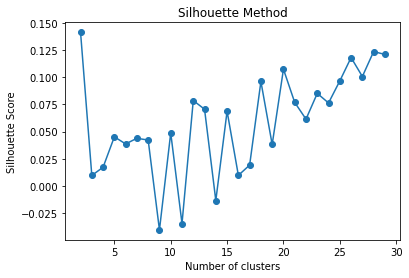

In [242]:
from sklearn.metrics import silhouette_score

# Lista do przechowywania wartości silhouette
silhouette_scores = []

# Przeprowadzenie iteracji po różnych wartościach klastrów
for i in range(2, 30):  # Możesz zmodyfikować zakres, aby dopasować do swoich potrzeb
    kmeans = KMeans(n_clusters=i, random_state=0)
    cluster_labels = kmeans.fit_predict(types_dummies)
    silhouette_avg = silhouette_score(types_dummies, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Wyświetlenie wykresu wartości silhouette w zależności od liczby klastrów
plt.plot(range(2, 30), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

Unikalne wartości w kolumnie 'types' wraz z częstościami:
Tourist attraction        646
Hotel                     621
Restaurant                583
Travel agency             393
Bakery                    381
                         ... 
Specialized hospital        1
Monument                    1
Cultural association        1
Coffee vending machine      1
Cars                        1
Length: 1962, dtype: int64


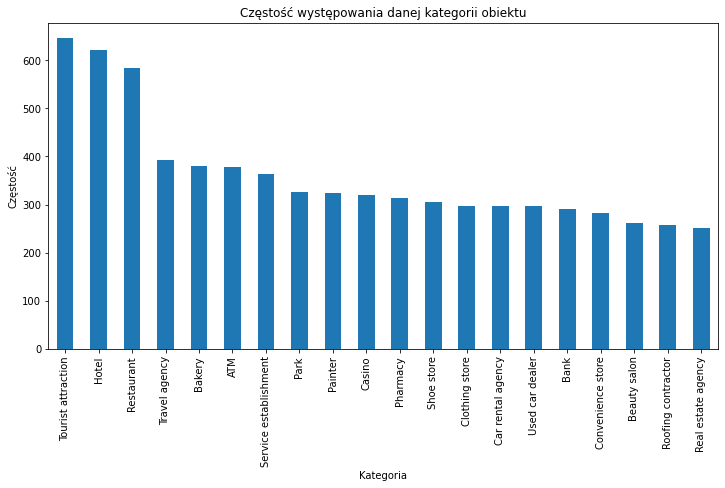

In [217]:
# Podział wartości w kolumnie 'types' na osobne tokeny
types_list = data['types'].str.split(', ')

# Utworzenie listy unikalnych kategorii
unique_categories = []
for types in types_list:
    unique_categories.extend(types)

# Wyświetlenie unikalnych wartości wraz z ich częstościami
value_counts_types = pd.Series(unique_categories).value_counts()
print("Unikalne wartości w kolumnie 'types' wraz z częstościami:")
print(value_counts_types)

value_counts_top = value_counts_types.head(20)
# Wykres słupkowy częstości występowania wartości
plt.figure(figsize=(12, 6))
value_counts_top.plot(kind='bar')
plt.xlabel('Kategoria')
plt.ylabel('Częstość')
plt.title('Częstość występowania danej kategorii obiektu')
plt.show()